In [1]:

import cv2
from matplotlib import pyplot as plt
from skimage import feature
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
# Load an color image in grayscale
imgs = []
for i in range(1,6):
    imgs.append(cv2.imread('./temp/test'+str(i)+'.JPG'))
    imgs[i-1] = cv2.cvtColor(imgs[i-1], cv2.COLOR_BGR2GRAY)

In [3]:
# Load an color image in grayscale
imgs_1 = []
for i in range(1,20):
    imgs_1.append(cv2.imread('./temp/1/'+str(i)+'.PNG'))
    imgs_1[i-1] = cv2.cvtColor(imgs_1[i-1], cv2.COLOR_BGR2GRAY)
# Load an color image in grayscale
imgs_2 = []
for i in range(1,21):
    imgs_2.append(cv2.imread('./temp/2/'+str(i)+'.PNG'))
    imgs_2[i-1] = cv2.cvtColor(imgs_2[i-1], cv2.COLOR_BGR2GRAY)
# Load an color image in grayscale
imgs_3 = []
for i in range(1,20):
    imgs_3.append(cv2.imread('./temp/3/'+str(i)+'.PNG'))
    imgs_3[i-1] = cv2.cvtColor(imgs_3[i-1], cv2.COLOR_BGR2GRAY)

In [4]:
# import the necessary packages
from skimage import feature
import numpy as np
class LocalBinaryPatterns:
    def __init__(self, numPoints, radius):
        # store the number of points and radius
        self.numPoints = numPoints
        self.radius = radius
    def describe(self, image, eps=1e-7):
        # compute the Local Binary Pattern representation
        # of the image, and then use the LBP representation
        # to build the histogram of patterns
        lbp = feature.local_binary_pattern(image, self.numPoints,
            self.radius, method="uniform")
        (hist, _) = np.histogram(lbp.ravel(),
            bins=np.arange(0, self.numPoints + 3),
            range=(0, self.numPoints + 2))
        # normalize the histogram
        hist = hist.astype("float")
        hist /= (hist.sum() + eps)
        # return the histogram of Local Binary Patterns
        return hist

In [5]:
# initialize the local binary patterns descriptor along with
# the data and label lists
desc = LocalBinaryPatterns(24, 8)
data = []
labels = []

# loop over the training images
for img in imgs_1:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("1")
	data.append(hist)
for img in imgs_2:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("2")
	data.append(hist)
for img in imgs_3:
	# load the image, convert it to grayscale, and describe it
	hist = desc.describe(img)
	# extract the label from the image path, then update the
	# label and data lists
	labels.append("3")
	data.append(hist)


In [6]:
# train a Linear SVM on the data
# model = LinearSVC(random_state = 0)
# model.fit(data, labels)
model = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
model.fit(data, labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC())])

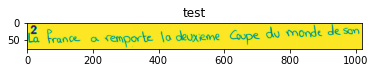

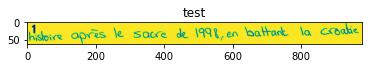

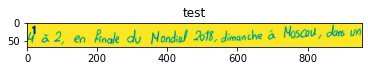

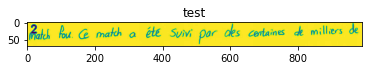

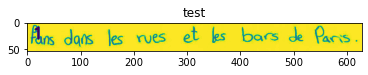

In [7]:
# loop over the testing images
for image in imgs:
    hist = desc.describe(image)
    prediction = model.predict(hist.reshape(1, -1))
    # display the image and the prediction
    cv2.putText(image, prediction[0], (10, 30), cv2.FONT_HERSHEY_SIMPLEX,1.0, (0, 0, 255), 3)
    plt.imshow(image)
    plt.title('test')
    plt.show()